In [43]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Load the data

In [45]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('data/diagnosis.csv')
dataset = pd_dat.values
pd_dat.head()

0  1  2  3  4  5  6  7
0  35.5  0  1  0  0  0  0  0
1  35.9  0  0  1  1  1  1  0
2  35.9  0  1  0  0  0  0  0
3  36.0  0  0  1  1  1  1  0
4  36.0  0  1  0  0  0  0  0

In [46]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)
X_train.shape,Y_train.shape

((80, 6), (80, 2))

In [47]:
np.transpose(X_train).shape

(6, 80)

In [6]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

In [7]:
temp_train.shape

(80,)

#### Build the model

In [8]:
# Build the input layers

from tensorflow.keras import Input,layers
shape_input = [1,]
temperature = Input(shape=shape_input,name="temp")
nausea_occurence = Input(shape=shape_input,name="nocc")
lumbar_pain = Input(shape=shape_input,name="lumbp")
urine_pushing = Input(shape=shape_input,name="up")
micturition_pains = Input(shape=shape_input,name="mict")
bis = Input(shape=shape_input,name="bis")

In [9]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [10]:
# Merge all input features into a single large vector
x = layers.concatenate(list_inputs)


In [11]:
# Use a logistic regression classifier for disease prediction

inflammation_pred = layers.Dense(units = 1,activation = "sigmoid",name="inflan")(x) 
nephritis_pred =layers.Dense(units= 1,activation = "sigmoid",name="nephr")(x)


In [12]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [13]:
# Create the model object
from tensorflow.keras import Model
model = Model(inputs = list_inputs,outputs=list_outputs)



In [14]:
from sklearn.utils import compute_class_weight
keys = np.unique(inflam_train)
values = compute_class_weight("balanced", keys, inflam_train)
cwinflam = dict(zip(keys, values))

keys = np.unique(nephr_train)
values = compute_class_weight("balanced", keys, nephr_train)
cwnephr = dict(zip(keys, values))



#### Plot the model

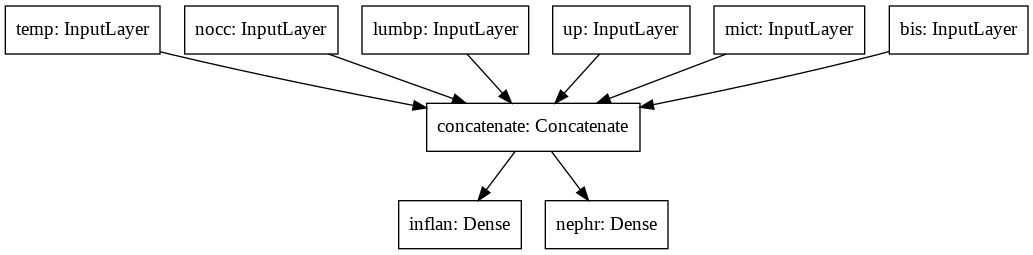

In [15]:
# Display the multiple input/output model
from tensorflow.keras.utils import plot_model
plot_model(model,"modelarhcitect.png")

#### Compile the model

In [16]:
# Compile the model
METRICSinflan =[tf.keras.metrics.BinaryAccuracy(name="ACCinflan")]
METRICSnephr = [tf.keras.metrics.BinaryAccuracy(name="ACCnephr")]
model.compile(loss= {"inflan":tf.keras.losses.BinaryCrossentropy(), "nephr" :tf.keras.losses.BinaryCrossentropy()},
             optimizer= tf.keras.optimizers.Adam(0.01),
             loss_weights={"inflan" : 0.8,"nephr":0.9},
             metrics={"inflan" : METRICSinflan,
                     "nephr":METRICSnephr})

#### Fit the model 

In [17]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflan': inflam_train, 'nephr': nephr_train}

In [18]:
# Train the model

history = model.fit(inputs_train,outputs_train,
         epochs =1000,
         class_weight=[cwinflam,cwnephr],
         batch_size = 100,validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/1000
64/64 [==============================] - 2s 38ms/sample - loss: 26.0288 - inflan_loss: 14.7338 - nephr_loss: 15.8242 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 27.9303 - val_inflan_loss: 17.4261 - val_nephr_loss: 15.5439 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 2/1000
64/64 [==============================] - 0s 202us/sample - loss: 25.6864 - inflan_loss: 14.5316 - nephr_loss: 15.6235 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 27.5509 - val_inflan_loss: 17.1799 - val_nephr_loss: 15.3411 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 3/1000
64/64 [==============================] - 0s 1ms/sample - loss: 25.3441 - inflan_loss: 14.3294 - nephr_loss: 15.4228 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 27.1715 - val_inflan_loss: 16.9337 - val_nephr_loss: 15.1383 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 4/100

#### Plot the learning curves

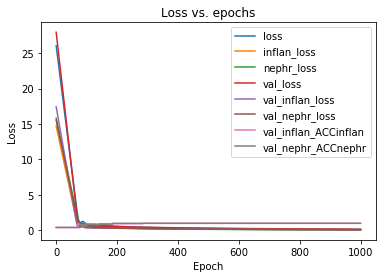

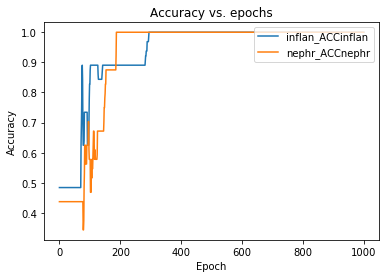

In [19]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflan_ACCinflan', 'nephr_ACCnephr')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [20]:
# Evaluate the model



***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [3]:
import numpy as np

#### Create Variable objects

In [14]:
# Create Variable objects of different type with tf.Variable
strings = tf.Variable(initial_value = ["Hello Stranger"],dtype=tf.string)
floats = tf.Variable(initial_value = [3.14123, 2.71828], dtype=tf.float64)
ints = tf.Variable(initial_value=[1, 2, 3], dtype=tf.int32,shape=(3))
complexs = tf.Variable(initial_value=[25.9 - 7.39j, 1.23 - 491j],dtype=tf.complex128)


In [11]:
# Initialise a Variable value
tf.Variable(initial_value = tf.constant(7.2, shape=(3,3) , dtype = tf.float64))

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float64, numpy=
array([[7.2, 7.2, 7.2],
       [7.2, 7.2, 7.2],
       [7.2, 7.2, 7.2]])>

#### Use and modify Variable values

In [23]:
# Use the value of a Variable
v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w) , w)

<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(1.0, shape=(), dtype=float32)


In [24]:
# Increment the value of a Variable

v.assign_add(1)

## If we use below operation the type will change to tensor,so becareful
#v = v + 1
#v

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.0>

In [25]:
# Decrement the value of a Variable

v.assign_sub(1)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0>

#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [28]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [30]:
# Obtain the value as a numpy array

x = x.numpy()
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [32]:
# Create a Tensor of type float32
tensorExample = tf.constant([[2.3, 4.2, 31.2],
                            [2.1, 21.1, 33.4]], shape = (2,3), dtype=tf.float32)
tensorExample

<tf.Tensor: id=222, shape=(2, 3), dtype=float32, numpy=
array([[ 2.3,  4.2, 31.2],
       [ 2.1, 21.1, 33.4]], dtype=float32)>

In [33]:
# Create coefficients

coeffs = np.arange(16)

In [46]:
# Initialise shapes
shape1 = (8,2)
shape2 = (4,4)
shape3 = (2,2,2,2)


In [47]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int64)


#### Useful Tensor operations

In [48]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])
t

<tf.Tensor: id=277, shape=(5, 2, 8), dtype=int64, numpy=
array([[[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]],

       [[16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31]],

       [[32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47]],

       [[48, 49, 50, 51, 52, 53, 54, 55],
        [56, 57, 58, 59, 60, 61, 62, 63]],

       [[64, 65, 66, 67, 68, 69, 70, 71],
        [72, 73, 74, 75, 76, 77, 78, 79]]])>

In [50]:
# Get the rank of a Tensor

print(f"rank {tf.rank(t)}")

rank 3


In [ ]:
# Display the rank

#print("rank: ", rank)

In [51]:
# Reshape a Tensor

t2 = tf.reshape(t , [8,10])

In [53]:
# Display the new shape

print("t2.shape: ", t2.shape)
t2

t2.shape:  (8, 10)


<tf.Tensor: id=280, shape=(8, 10), dtype=int64, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79]])>

In [56]:
# Create ones, zeros, identity and constant Tensors
ones = tf.ones(shape=(2,3))
zeros = tf.zeros(shape=(2,4))
eye = tf.eye((3))
tensor7 = tf.constant(7,shape=(5,2))


In [57]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)

 Zeros:
  tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(2, 4), dtype=float32)

 Identity:
  tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[7 7]
 [7 7]
 [7 7]
 [7 7]
 [7 7]], shape=(5, 2), dtype=int32)


In [58]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [59]:
# Concatentate two Tensors
concat0= tf.concat([t1,t2], axis = 0)
concat1 = tf.concat([t1,t2],axis = 1)


In [60]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [62]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)
t


 t shape:  (3, 2, 4)


<tf.Tensor: id=321, shape=(3, 2, 4), dtype=int64, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])>

In [72]:
# Expanding the rank of Tensors

t1 = tf.expand_dims(t,axis = 0)
t2 = tf.expand_dims(t,axis = 1)
t3 = tf.expand_dims(t,axis = 2)

In [73]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)
t1


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 1, 2, 4) 
 t3 shape:  (3, 2, 1, 4)


<tf.Tensor: id=336, shape=(1, 3, 2, 4), dtype=int64, numpy=
array([[[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]]]])>

In [74]:
# Squeezing redundant dimensions

t1 = tf.squeeze(t1,axis = 0) 
t2 = tf.squeeze(t2,axis = 1)
t3 = tf.squeeze(t3,axis = 2)

In [75]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [76]:
# Slicing a Tensor
t1[:,:,2:4] # same As numpy


<tf.Tensor: id=347, shape=(3, 2, 2), dtype=int64, numpy=
array([[[ 2,  3],
        [ 6,  7]],

       [[10, 11],
        [14, 15]],

       [[18, 19],
        [22, 23]]])>

#### Doing maths with Tensors

In [80]:
# Create two constant Tensors

c = tf.constant(
[
    [1.0, 2.0], 
    [3.0, 4.0]
],shape = (2,2) )
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [81]:
# Matrix multiplication
matmul_cd = tf.matmul(c,d)


In [82]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)


 tf.matmul(c,d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [83]:
# Elementwise operations
c_times_d = c * d
c_plus_d = c + d
c_div_c = c / c
c_minus_d = c - d

In [84]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [93]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [94]:
# Absolute value of a Tensor
absx = tf.abs(x)


In [95]:
# Power of a Tensor

powab = tf.pow(a,b)

In [96]:
# Display the results

print("\n ", absx)
print("\n ", powab)


  tf.Tensor(
[[7.11621388]
 [3.32777704]], shape=(2, 1), dtype=float64)

  tf.Tensor(
[[ 256 2187]
 [   9   27]], shape=(2, 2), dtype=int32)


#### Randomly sampled constant tensors

In [4]:
# Create a Tensor with samples from a Normal distribution

tn = tf.random.normal(shape=(5,10),mean = 0, stddev=1)
tn

<tf.Tensor: id=5, shape=(5, 10), dtype=float32, numpy=
array([[-0.35271057, -0.7917023 ,  1.7696445 ,  0.8344165 ,  1.6126101 ,
         1.8461742 ,  0.8372006 , -1.8459777 ,  1.0489106 , -0.6381805 ],
       [ 0.6380718 ,  1.4629724 , -1.7423173 ,  0.9024292 ,  0.6636979 ,
         1.0361516 ,  0.4947932 , -0.18623576,  0.96816486,  0.584203  ],
       [ 1.3643156 , -0.17798193,  0.16909006, -0.1314653 , -0.31844223,
         1.9281242 , -0.4588647 ,  0.8891179 ,  1.2839804 , -0.46949607],
       [ 2.685032  ,  0.48473662,  0.3812191 , -1.0461713 ,  0.88340884,
         1.6374695 , -0.6201737 , -0.9191223 , -0.58517635, -0.24934758],
       [ 1.2688562 , -0.9258092 ,  0.951846  ,  1.7733339 , -0.23112026,
        -0.07862767, -1.589432  ,  0.40023768, -0.35047227,  0.8252486 ]],
      dtype=float32)>

In [6]:
# Create a Tensor with samples from a Uniform distribution
tu = tf.random.uniform(shape=(5,5),minval = 0 , maxval = 100)
tu

<tf.Tensor: id=19, shape=(5, 5), dtype=float32, numpy=
array([[78.50624  , 17.784739 , 59.598244 ,  9.8272085, 31.587875 ],
       [45.69948  , 49.644386 ,  7.4820757, 82.908356 , 26.052225 ],
       [71.87839  , 27.87013  , 58.183815 , 83.923744 , 40.164173 ],
       [71.90554  , 34.655834 , 78.50391  , 71.4382   , 23.725403 ],
       [16.93567  , 96.218636 , 83.056244 , 54.533886 , 81.13382  ]],
      dtype=float32)>

In [8]:
# Create a Tensor with samples from a Poisson distribution
tp = tf.random.poisson(shape = (3,3),lam =4)
tp

<tf.Tensor: id=25, shape=(3, 3), dtype=float32, numpy=
array([[7., 4., 5.],
       [3., 3., 8.],
       [1., 5., 1.]], dtype=float32)>

In [11]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(e)
d ,  e , f

(<tf.Tensor: id=31, shape=(5, 10), dtype=float32, numpy=
 array([[1.24404751e-01, 6.26792490e-01, 3.13164163e+00, 6.96250916e-01,
         2.60051131e+00, 3.40835929e+00, 7.00904787e-01, 3.40763354e+00,
         1.10021353e+00, 4.07274336e-01],
        [4.07135576e-01, 2.14028835e+00, 3.03566957e+00, 8.14378500e-01,
         4.40494895e-01, 1.07361019e+00, 2.44820312e-01, 3.46837565e-02,
         9.37343180e-01, 3.41293156e-01],
        [1.86135709e+00, 3.16775665e-02, 2.85914484e-02, 1.72831248e-02,
         1.01405449e-01, 3.71766281e+00, 2.10556805e-01, 7.90530622e-01,
         1.64860559e+00, 2.20426559e-01],
        [7.20939636e+00, 2.34969586e-01, 1.45328000e-01, 1.09447443e+00,
         7.80411184e-01, 2.68130636e+00, 3.84615421e-01, 8.44785750e-01,
         3.42431366e-01, 6.21742159e-02],
        [1.60999596e+00, 8.57122660e-01, 9.06010807e-01, 3.14471316e+00,
         5.34165725e-02, 6.18231017e-03, 2.52629399e+00, 1.60190195e-01,
         1.22830816e-01, 6.81035221e-01]], dt

***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [3]:
# Load the VGG19 model
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
vgg_model = load_model("models/Vgg19.h5")
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_input

<tf.Tensor 'input_4:0' shape=(None, 224, 224, 3) dtype=float32>

#### Build a model to access the layer outputs

In [5]:
from tensorflow.keras.models import Model

In [6]:
# Build a model that returns the layer outputs
layer_outputs = [layer.output for layer in vgg_layers]
type(layer_outputs )


list

In [8]:
features = Model(inputs = vgg_input, outputs = layer_outputs)

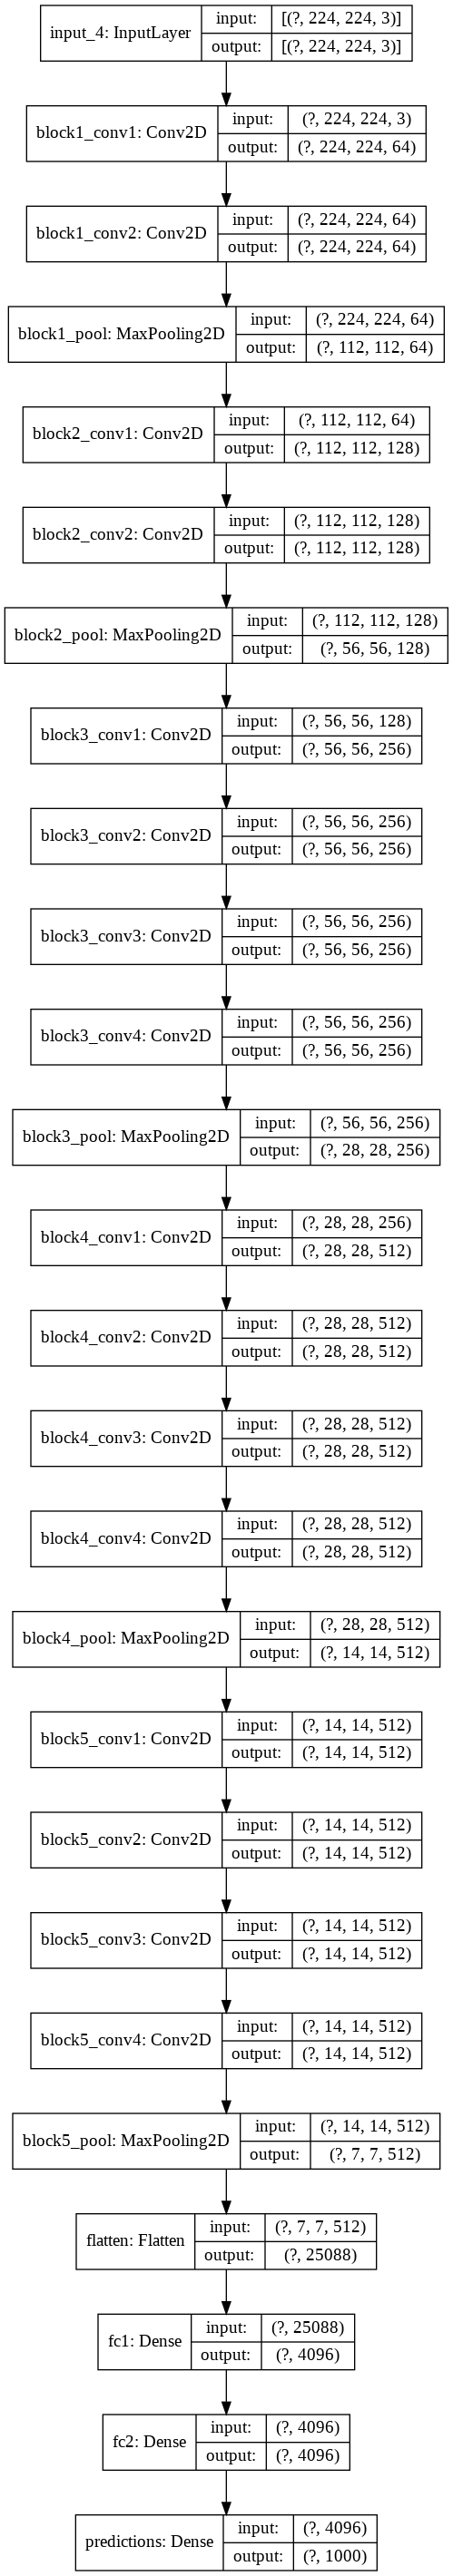

In [9]:
# Plot the model

from tensorflow.keras.utils import plot_model
plot_model(features, "Vgg_Model.png",show_shapes = True)

In [10]:
# Test the model on a random input

img = np.random.random((0,224,224,3)).astype("float32")
extracted_features = features(img)


#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

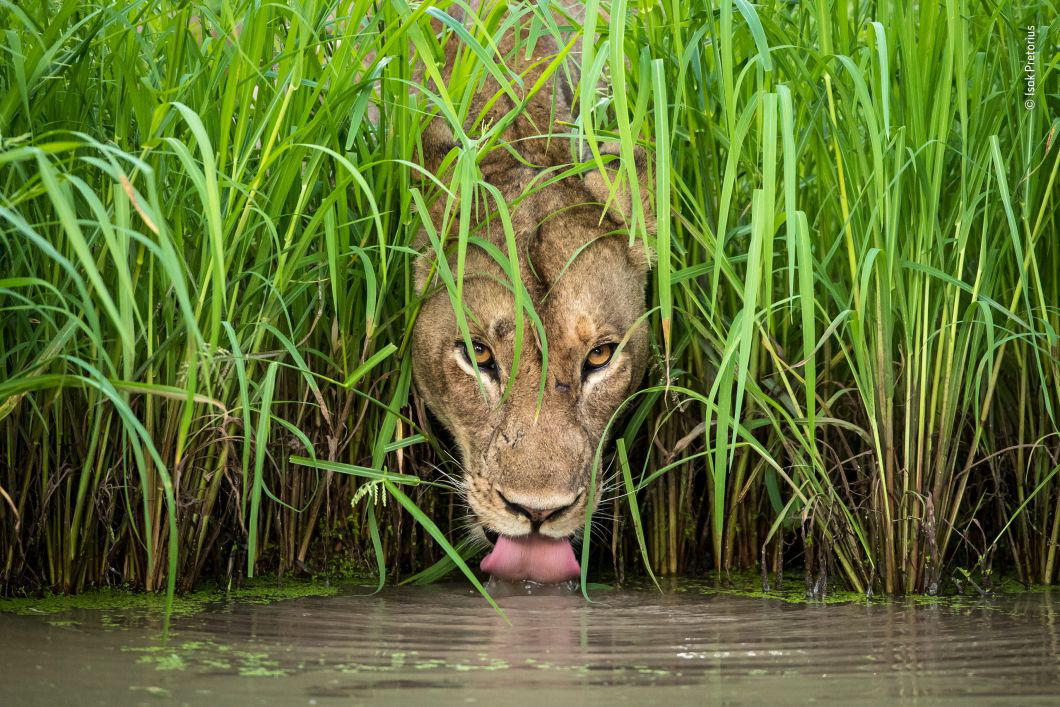

In [11]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('data/cool_cat.jpg'))

#### Visualise network features from the input image

In [12]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = 'data/cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [13]:
# Extract the features
print(x.shape)
extracted_features = features(x)
print(np.array(extracted_features).shape)
print(type(extracted_features[0]))
f1 = extracted_features[0]
print(f"\n{f1.shape}")

(1, 224, 224, 3)
(26, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>

(1, 224, 224, 3)


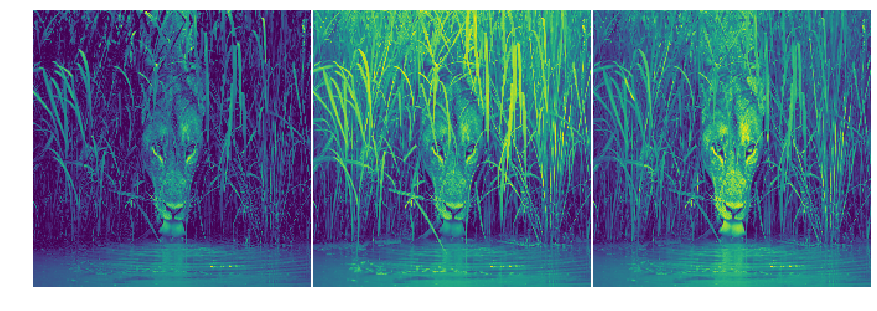

In [15]:
# Visualise the input channels
plt.figure(figsize=(15,15))
for n in range(0,3):
    ax = plt.subplot(1,3,n+1)
    plt.imshow(f1[0,:,:,n])
    plt.axis("off")

plt.subplots_adjust(wspace = 0.01, hspace =0.01)

(1, 224, 224, 64)


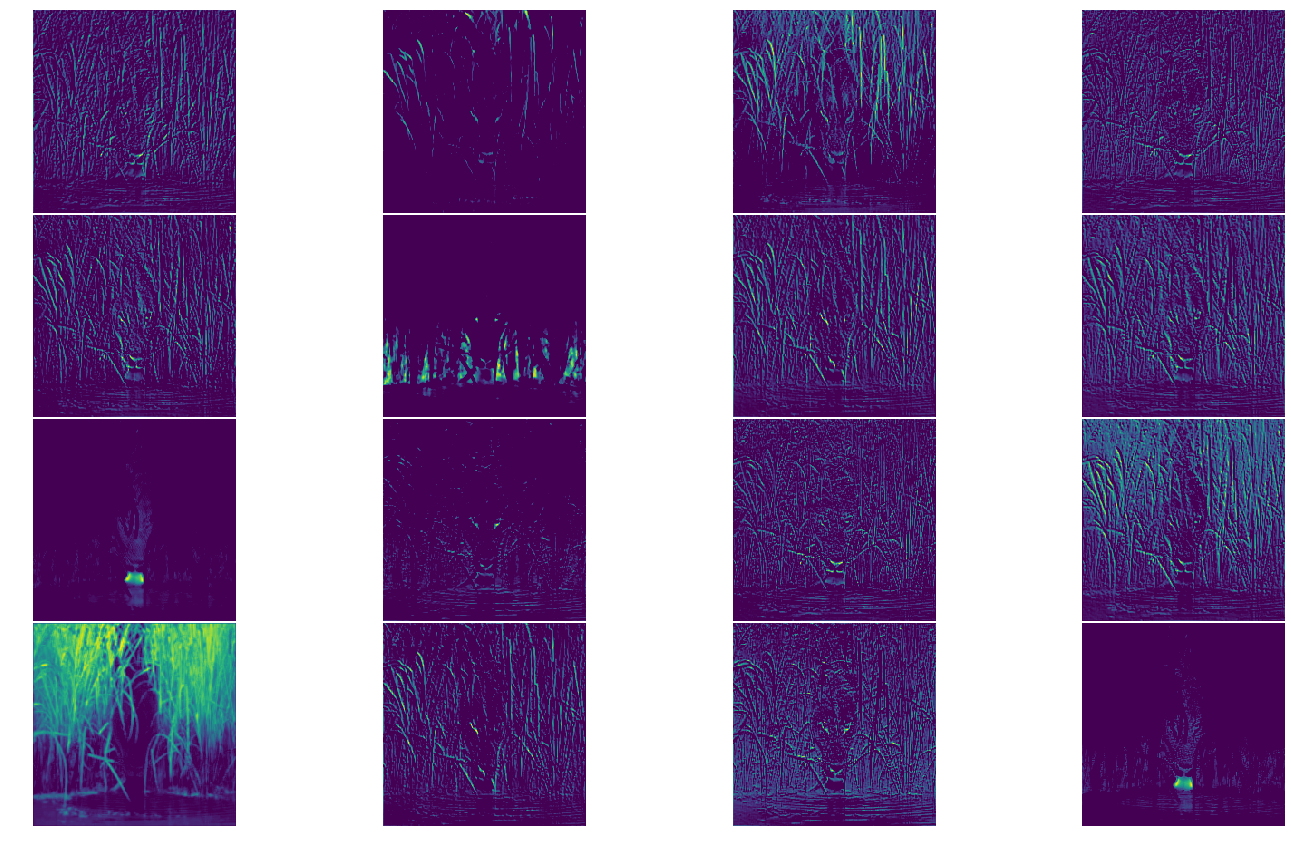

In [16]:
# Visualise some features in the first hidden layer
f2 = extracted_features[1]
imgs = f2[0,:, :, :]
print(f2.shape)
plt.figure(figsize=(25,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(f2[0,:,:,n])
    plt.axis("off")

plt.subplots_adjust(wspace = 0.01, hspace =0.01)

(1, 14, 14, 512)


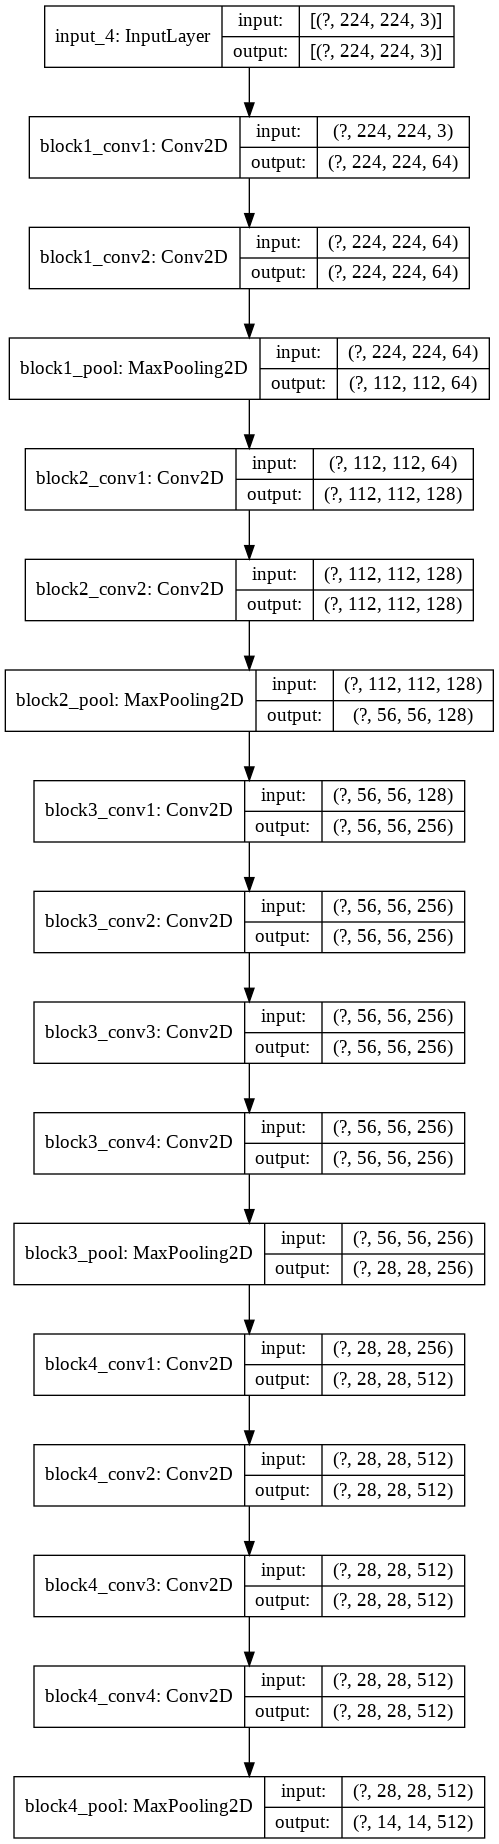

In [21]:
# Build a model to extract features by layer name

Extracted_features_block4_pool = Model(inputs = features.input, outputs= features.get_layer("block4_pool").output)
block4_pool_features = Extracted_features_block4_pool.predict(x)
print(block4_pool_features.shape)
plot_model(Extracted_features_block4_pool,"Sampis.png",show_shapes=True)

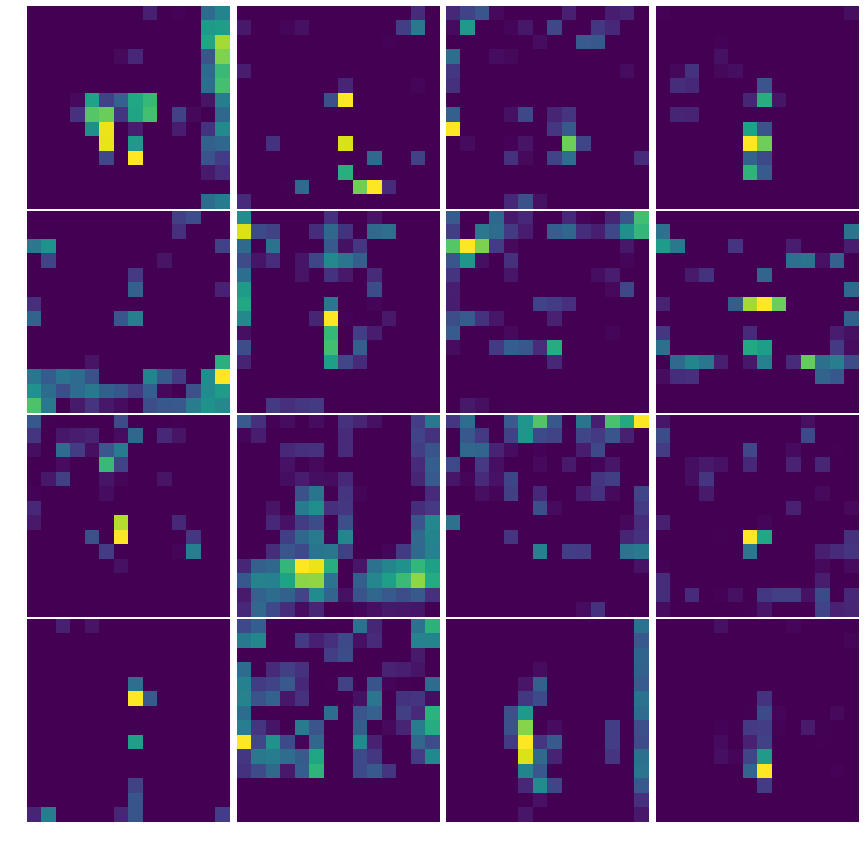

In [30]:
# Visualise some features from the extracted layer output
block4_pool_features
plt.figure(figsize=(15,15))
for n in range(0,16):
    ax = plt.subplot(4,4,n+1)
    ax.imshow(block4_pool_features[0,:,:,n])
    ax.set_axis_off()
plt.subplots_adjust(wspace = 0.01,hspace = 0.01 )


(1, 14, 14, 512)


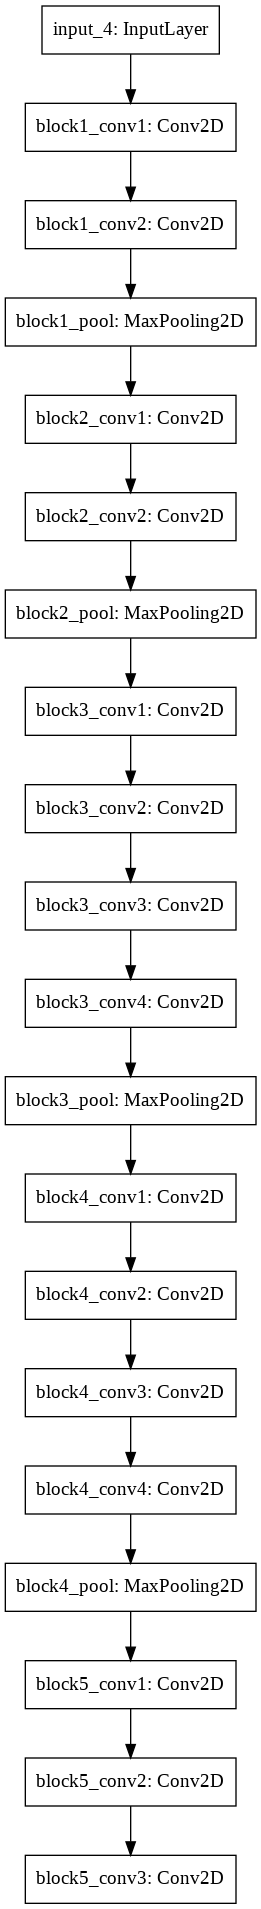

In [32]:
# Extract features from a layer deeper in the network
block5_conv3_model = Model(inputs = features.input, outputs = features.get_layer("block5_conv3").output)
PredictedImage = block5_conv3_model.predict(x)
print(PredictedImage.shape)
plot_model(block5_conv3_model)


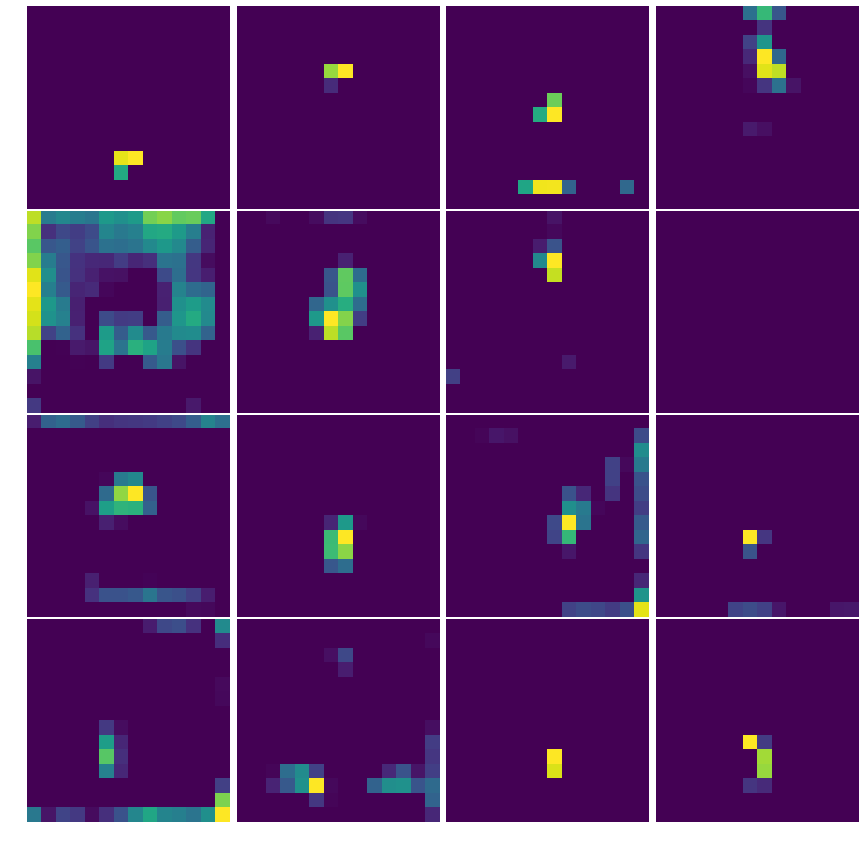

In [42]:
# Visualise some features from the extracted layer output
plt.figure(figsize=(15,15))
for n in range(0,16):
    ax = plt.subplot(4,4,n+1)
    ax.imshow(PredictedImage[0,:,:,n])
    ax.set_axis_off()
plt.subplots_adjust(wspace = 0.01,hspace =0.01)

***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [49]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [50]:
# Display the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [65]:
# Retrieve the weights and biases
def get_weights(model):
    return [e.weights[0].numpy() for e in model.layers]
def get_biases(model):
    return [e.bias.numpy() for e in model.layers]
def drawshit(model):
    plt.figure(figsize=(8,8))
    for n in range(3):
        delta_l = W1_layers[n] - W0_layers[n]
        print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
        ax = plt.subplot(1,3,n+1)
        plt.imshow(delta_l)
        plt.title('Layer '+str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation');
weig = get_weights(model)
lol = get_biases(model)
print(lol)
weig


[array([1., 1., 1., 1.], dtype=float32), array([1., 1.], dtype=float32), array([0., 0., 0., 0.], dtype=float32)]


[array([[ 0.032107  ,  0.03051868,  0.03800024, -0.00482426],
        [ 0.04567042, -0.00662924,  0.03362941, -0.03259154],
        [-0.03568164,  0.02801032,  0.00752159, -0.0293183 ],
        [ 0.02641895, -0.0408252 ,  0.02473079, -0.04055928]],
       dtype=float32), array([[-0.18944861, -0.70408726],
        [-0.30211338, -0.6326024 ],
        [ 0.18502602,  0.9021538 ],
        [ 0.9959605 , -0.11715557]], dtype=float32), array([[-0.25417304, -0.46265984,  0.6220405 ,  0.7373097 ],
        [-0.25039792, -0.15760803,  0.99341106, -0.33652616]],
       dtype=float32)]

In [66]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [67]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [74]:
# Retrieve weights and biases

W0_layers = get_weights(model)
b0_layers = get_biases(model)


In [75]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [76]:

W1_layers = get_weights(model) 
b1_layers = get_biases(model)

Layer 0: bias variation:  0.049684573
Layer 1: bias variation:  0.045457415
Layer 2: bias variation:  0.14901821


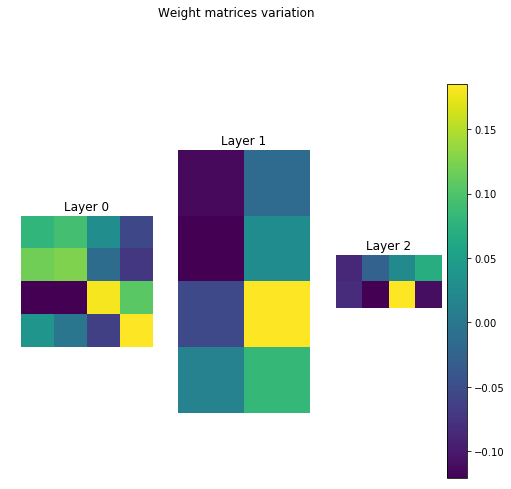

In [77]:
# Plot the variation
drawshit(model)

#### Freeze layers at build time

In [80]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [81]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [82]:
# Build the model
model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])
model.layers[0].trainable = False


In [83]:
# Count the trainable and non trainable variables after the freezing
n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [84]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [85]:
# Retrieve weights and biases
W0_layers = get_weights(model)
b0_layers = get_biases(model)


In [86]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [87]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_biases(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.12318361
Layer 2: bias variation:  0.2329058


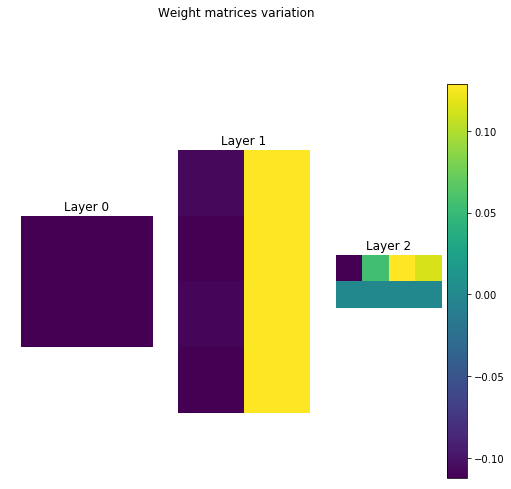

In [88]:
# Plot the variation

drawshit(model)

#### Freeze layers of a pre-built model

In [89]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [90]:
# Freeze the second layer
model.layers[1].trainable = False


In [91]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [93]:
W0_layers = get_weights(model)
b0_layers = get_biases(model)


In [94]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [95]:
# Retrieve weights and biases
W1_layers = get_weights(model)
b1_layers = get_biases(model)



Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.021388764


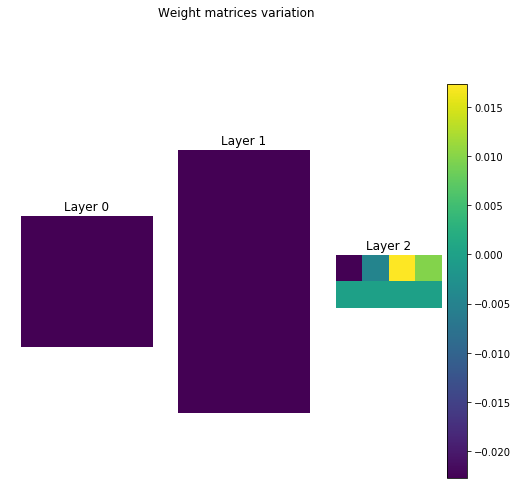

In [96]:
# Plot the variation

drawshit(model)